# Influencer Marketing Dynamics Across Social Media Channels: An Exploratory Analysis




### Executive Summary

<div style="text-align: justify"> 
    This report provides an analysis of influencer marketing dynamics. The aim is to provide first touch guidance to brands on leveraging social media marketing via influencers effectively. Based on data extracted from multiple CSV files, the study examines key metrics like Followers count, Engagement Rate (ER), Reach, and Topic of Influence across 4 social media channels: YouTube, Instagram, Threads and TikTok. The study reveals that while Instagram is the most popular channel across various metrics, other platforms like TikTok and YouTube also play a significant role, each with its unique strengths. The analysis of influencer data by country highlights the importance of considering geographical factors in campaign planning. The US shows the largest influencer audience, while countries like Egypt and South Korea demonstrate higher engagement rates. Suggesting that follower count alone is not a sufficient indicator of campaign success. Furthermore, the study identifies popular topics of influence, such as entertainment music, fashion, and sports, and analyses their correlation with Reach and Engagement. It also reveals varying correlations between followers, engagement rate, and reach across different channels. This emphasises the need for a distinct understanding of platform-specific dynamics when designing influencer marketing strategies.
In conclusion, this study provides a solid starting point for brands to make informed decisions about their influencer marketing strategies, considering factors like channel selection, target audience, and topic of influence. It also highlights the need for further research to explore the nuances of influencer marketing dynamics and provide more detailed guidance. 
</div>

### Introduction

In today's dynamic digital landscape, brands are leveraging the power of social media influencers to reach their target audiences and drive purchase decisions. This complex landscape requires careful consideration of various factors, including category popularity, influencer reach, and social media platform effectiveness.  This exploratory study aims to provide high-level guidance on navigating the complexities of influencer marketing. With the following research question in mind: How can brands leverage the power of social media influencers to effectively reach their target audience and drive purchase decisions?  

This question is a strong candidate for a data-driven solution due to the abundance of data generated. By analysing key metrics like follower count, engagement rate, reach, and topic of influence across those 4 social media channels, the study seeks to uncover the dynamics that contribute to successful influencer marketing campaigns.  

The study draws on data extracted from multiple CSV files, each containing information on up to 100 influencers per country. Through a combination of descriptive and inferential statistical methods, the study analyses the relationships between these metrics, providing insights into the most popular channels and the correlation between follower count, engagement, and reach.The findings of this study will help brands make informed decisions about their influencer marketing strategies, considering factors beyond follower count to maximise their return on investment.


### Methods



The data used is taken by Web scraping and made available in Kaggle platform called the [Top 100 Social Media Influencers 2024 Countrywise](https://www.kaggle.com/datasets/bhavyadhingra00020/top-100-social-media-influencers-2024-countrywise). The Data is separated by Country names per folder. Each country folder has a total of 4 csv files with up to 100 entry rows for each file. Each entry represents an influencer and includes attributes such as rank, name, follower count, engagement rate, country, topic of influence, reach, gender and country of audience. 

I’ve performed a thorough cleaning in the data extracted from multiple CSV files. First, it merges these files, extracting channel information from the filenames, and combines them into a single DataFrame. Missing data in columns like FOLLOWERS and TOPIC OF INFLUENCE is then removed to ensure data completeness as those are considered crucial columns.

Next, the data undergoes some transformations to ensure consistency and usability. For instance:



*   Extracted the social media channel name from the filenames and created a new 'CHANNEL' column. This step adds relevant categorical information to the dataset, enabling analysis based on the social media platform.
*   Converted the ER column to numeric format after removed the '%' symbol;
*   Standardised the FOLLOWERS and POTENTIAL REACH columns by converting 'K' (thousand), 'M' (million) , and 'B' (billion)  suffixes to numeric values. 
*   Standardised text in the TOPIC OF INFLUENCE column by converting to lowercase and removing non-alphanumeric characters.
*   Removed duplicate rows, identified in the NAME column. 
*   Created a new USERNAME column by splitting the NAME column at the '@' symbol, separating the influencer's name from their social media handle.


  

The cleaned and transformed data resulted into a single merged file with 7 columns and 9122 entries with the following description:

- Rank: The ranking of the influencer in the top 100 list.
- Name: The name or pseudonym of the influencer.
- Follower Count: The total number of followers or subscribers the influencer has on their primary - platform(s).
- Engagement Rate: The level of interaction that the influencer's content receives from users on social media platforms, expressed as a percentage
* Country: The geographical location or country where the influencer is based or primarily operates
* Topic Of Influence: The niche or category in which the influencer specialises or creates content, such as fashion, beauty, technology, fitness, etc
* Reach: The primary social media platform(s) where the influencer is active, such as Instagram, YouTube, TikTok, Twitter, etc

The cleaned and transformed data was analysed using a combination of descriptive and inferential statistical methods.
* **Descriptive Analytics:** Frequency analysis was used to examine the distribution of categorical variables like Topic of Influence and Channel. Cross-tabulation was employed to explore relationships between these variables. Data visualisation techniques, including bar charts, tables, heatmaps were used to effectively present the findings.
* **Statistical Analysis:**  Techniques like Pearson correlation coefficient were applied to draw understandings in relations to reach, engagement and followers correlation. 



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
import seaborn as sns
import altair as alt


# Load the dataset
merged_df = pd.read_csv('merged_influencer_data.csv')


In [6]:
# Which channel has most followers, Engagement Rate, Reach?

# Group by channel and sum the followers
followers_by_channel = merged_df.groupby('CHANNEL')['FOLLOWERS'].sum()
followers_by_channel = followers_by_channel.sort_values(ascending=False)

# Which channel has highers Engagement Rate ? 
er_by_channel = merged_df.groupby('CHANNEL')['ER'].mean()
er_by_channel = er_by_channel.sort_values()


# Which channel has higher Reach ? 
reach_by_channel = merged_df.groupby('CHANNEL')['POTENTIAL REACH'].mean()
er_by_channel = er_by_channel.sort_values(ascending= False)


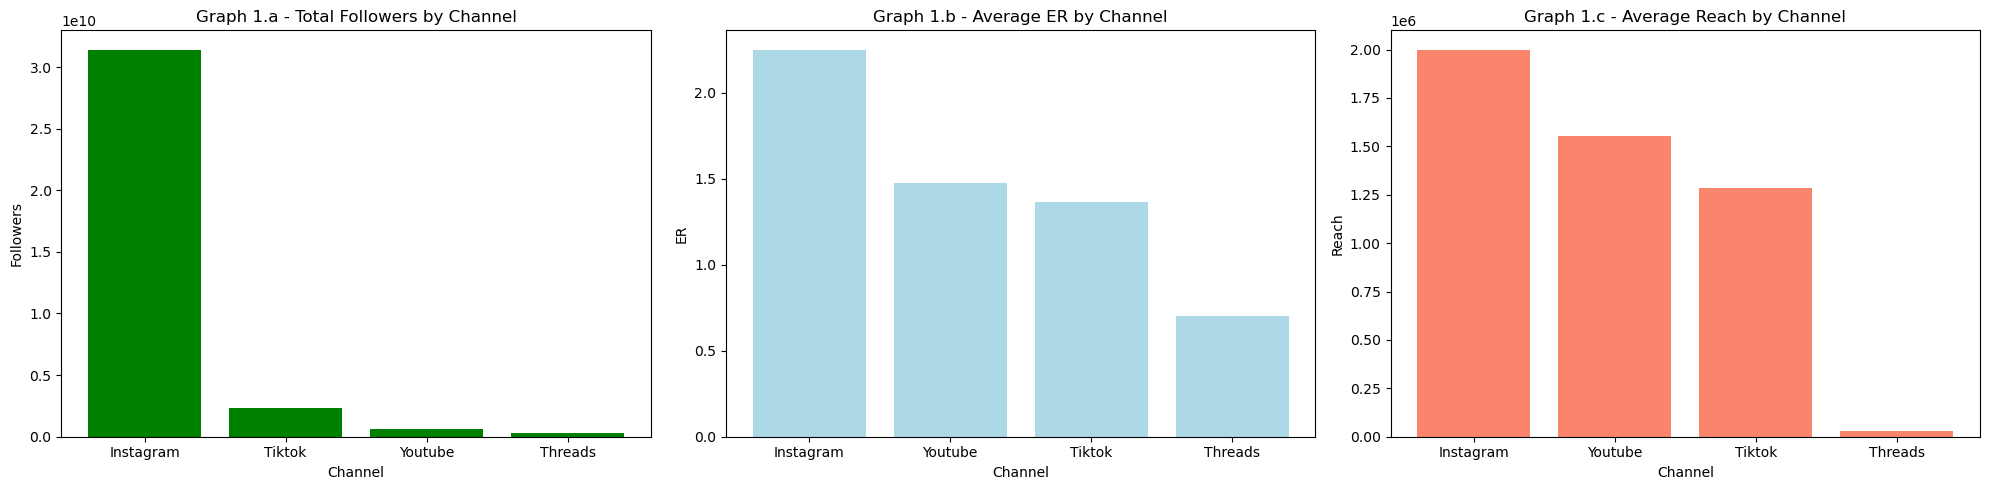

In [16]:
# --- Plotting ---
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # 1 row, 3 columns

# Plot for followers by channel
axes[0].bar(followers_by_channel.index, followers_by_channel, color='green')
axes[0].set_title('Graph 1.a - Total Followers by Channel')
axes[0].set_xlabel('Channel')
axes[0].set_ylabel('Followers')
axes[0].set_xticks(range(len(followers_by_channel.index)))  # Set tick positions
axes[0].set_xticklabels([channel.capitalize() for channel in followers_by_channel.index])  # Capitalize x-axis labels

# Plot for ER by channel
axes[1].bar(er_by_channel.index, er_by_channel, color='lightblue')
axes[1].set_title('Graph 1.b - Average ER by Channel')
axes[1].set_xlabel('Channel')
axes[1].set_ylabel('ER')
axes[1].set_xticks(range(len(er_by_channel.index)))  # Set tick positions
axes[1].set_xticklabels([channel.capitalize() for channel in er_by_channel.index])  # Capitalize x-axis labels

# Ensure reach_by_channel is sorted by its values in descending order
reach_by_channel = reach_by_channel.sort_values(ascending=False)

# Plot for Reach by channel
axes[2].bar(reach_by_channel.index, reach_by_channel, color='#f9856c')
axes[2].set_title('Graph 1.c - Average Reach by Channel')
axes[2].set_xlabel('Channel')
axes[2].set_ylabel('Reach')
axes[2].set_xticks(range(len(reach_by_channel.index)))  # Set tick positions
axes[2].set_xticklabels([channel.capitalize() for channel in reach_by_channel.index])  # Capitalize x-axis labels

plt.tight_layout()
plt.show()

## Results

First, the most popular Channel was checked by total number of followers, Engagement Rate (ER) and Potential Reach. As we can see from the graphs 1 (a,b,c) above, Instagram ranked the highest in all three categories explored. There are some variances for the other Channels, for instance Tiktok comes in second most popular in number of followers. However, Youtube comes in second regarding Average ER and Potential Reach. This analysis will not explore the nuances of such channels' popularity as that would engage on a totally different purpose of study. 


In [8]:
# Group by country and sum the followers
followers_by_country = merged_df.groupby('COUNTRY')['FOLLOWERS'].sum()
# Get the top 10 countries with the most followers
top_10_countries = followers_by_country.nlargest(10)
top_10_countries = top_10_countries.sort_values()

# ER by country 
er_by_country = merged_df.groupby('COUNTRY')['ER'].mean()
# Get the top 10 countries with the average ER
top_10_er_countries = er_by_country.nlargest(10) 
top_10_er_countries = top_10_er_countries.sort_values()

# Get the top 10 countries with the average Reach
reach_by_country = merged_df.groupby('COUNTRY')['POTENTIAL REACH'].mean()
# Get the top 10 countries with the average Reach
top_10_reach_countries = reach_by_country.nlargest(10) 
top_10_reach_countries = top_10_reach_countries.sort_values()

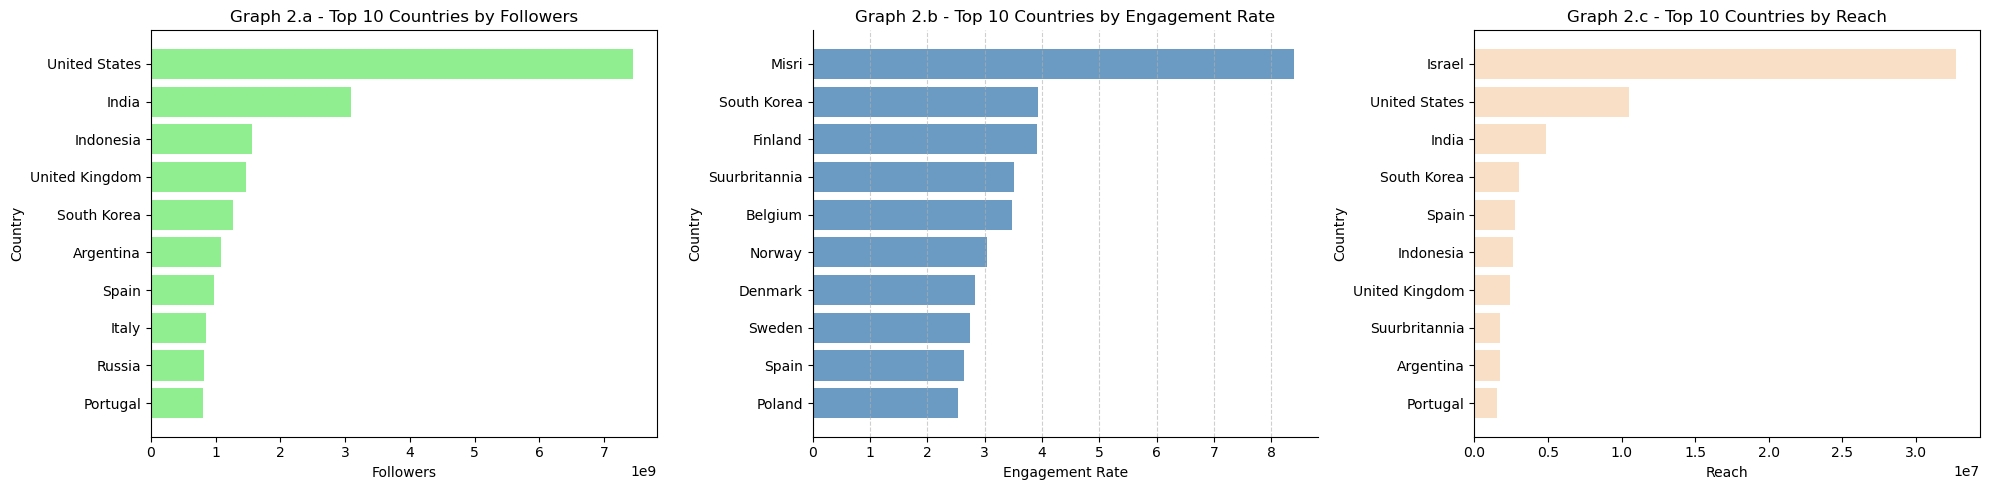

In [15]:
# --- Plotting ---
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # 1 row, 3 columns

# Plot for followers by country
axes[0].barh(top_10_countries.index, top_10_countries, color='lightgreen')
axes[0].set_title('Graph 2.a - Top 10 Countries by Followers')
axes[0].set_xlabel('Followers')
axes[0].set_ylabel('Country')

# Plot for ER by country
axes[1].barh(top_10_er_countries.index, top_10_er_countries, color='#4682B4', alpha=0.8)
axes[1].set_title('Graph 2.b - Top 10 Countries by Engagement Rate')
axes[1].set_xlabel('Engagement Rate')
axes[1].set_ylabel('Country')
axes[1].grid(axis='x', linestyle='--', alpha=0.6)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Plot for Reach by country
axes[2].barh(top_10_reach_countries.index, top_10_reach_countries, color='#f9dfc5')
axes[2].set_title('Graph 2.c - Top 10 Countries by Reach')
axes[2].set_xlabel('Reach')
axes[2].set_ylabel('Country')
# for i, v in enumerate(top_10_reach_countries):
#     label = f"{v/1e6:.1f}M"  # Format as millions with 1 decimal place
#     axes[2].text(v, i, label, ha='left', va='center', fontsize=8)
# axes[2].xaxis.set_major_formatter(lambda x, pos: f"{x/1e6:.1f}M")

plt.tight_layout()
plt.show()

Next, let’s look at the same metrics but this time grouped by Country. The data shows that different countries have different strengths. The United States for instance, has the biggest influencer audience, but places like Egypt and South Korea see higher engagement with influencers. Israel has the largest reach, meaning influencers there can potentially connect with a wider audience. This means that just having a lot of followers doesn't guarantee a successful influencer marketing campaign.  High engagement and reach are also essential. 

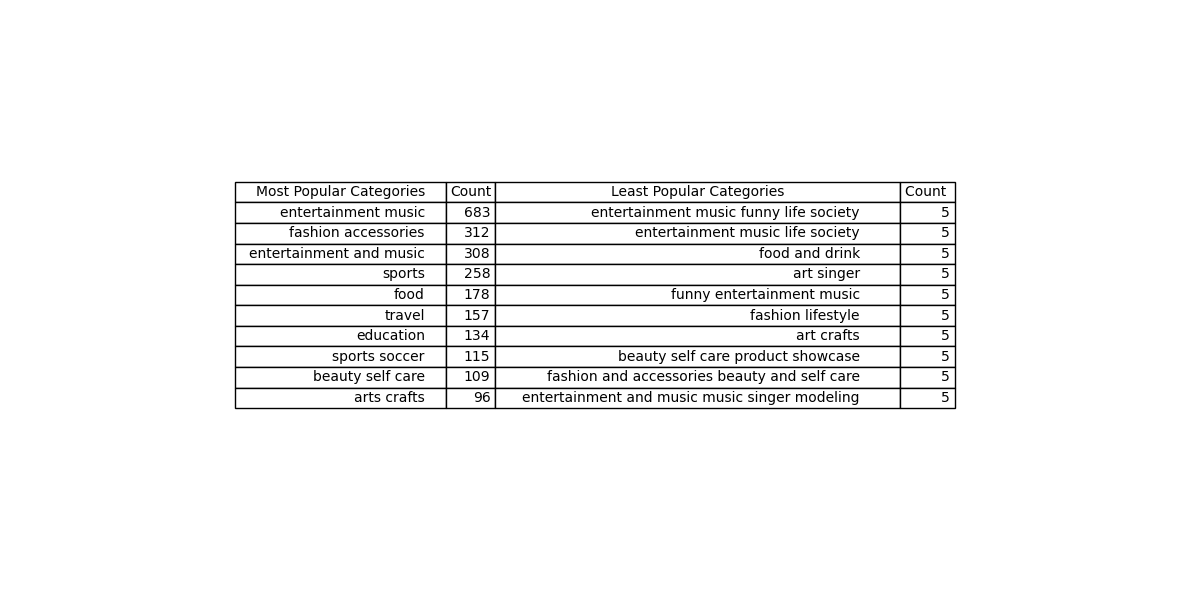

In [133]:
# Combine the Series into a single DataFrame
category_data = pd.DataFrame({
    "Most Popular Categories": most_popular_categories.index,
    "Count": most_popular_categories.values,
    "Least Popular Categories": least_popular_categories.index,
    "Count ": least_popular_categories.values  # Note the added space in "Count " to differentiate the column names
})

# --- Display the table using Matplotlib ---
fig, ax = plt.subplots(figsize=(12, 6))

# Hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# Create the table
table = ax.table(cellText=category_data.values,
                  colLabels=category_data.columns,
                  loc='center')
table.auto_set_column_width(col=list(range(len(category_data.columns))))  # Auto-adjust

fig.tight_layout()

plt.show()

Next, we’ve checked what would be the most popular Topics. The Table reveals trends in influencer specialisation. It shows that influencers tend to focus on specific areas of interest, with the most common being entertainment music, followed by fashion and sports. Less common, but still important, are areas like food, travel, education, and beauty. On the least popular categories we see less specialised and topics grouped. It implies that Influencers need to follow a niche by being category targeted as opposed to a broader category due to less popularity.

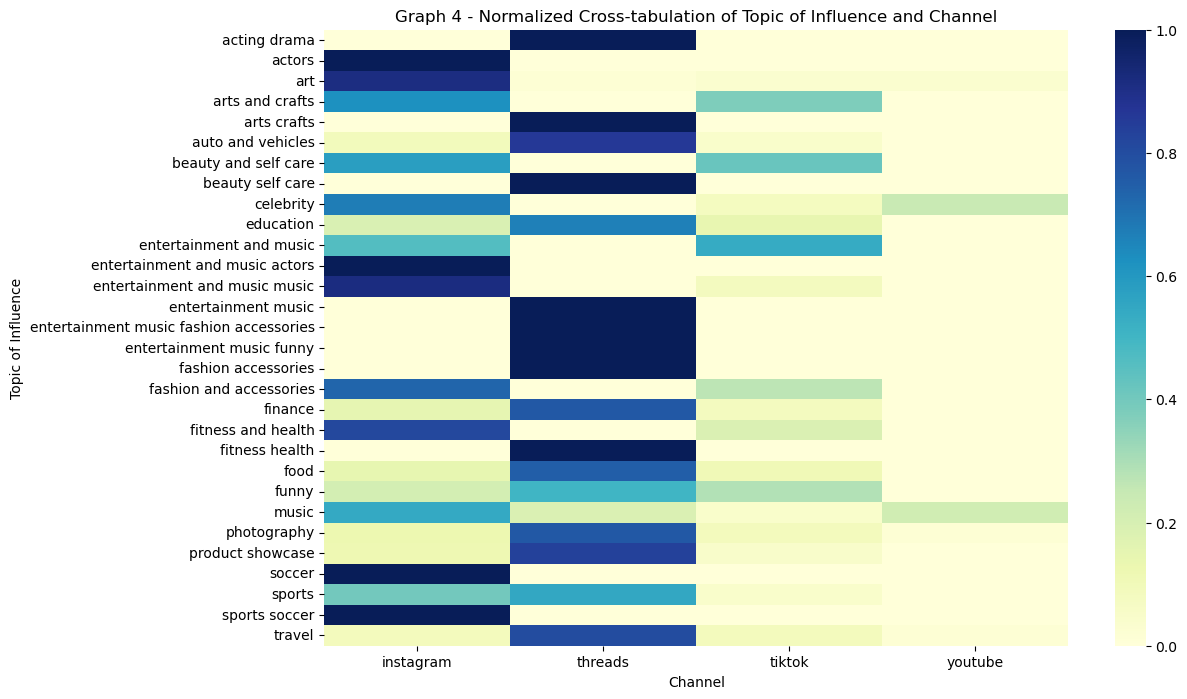

In [14]:
# Cross-tabulation

# Set the threshold for high frequency 
frequency_threshold = 30

# Get high-frequency topics
high_freq_topics = merged_df['TOPIC OF INFLUENCE'].value_counts()[
    merged_df['TOPIC OF INFLUENCE'].value_counts() > frequency_threshold
].index

# Get high-frequency channels
high_freq_channels = merged_df['CHANNEL'].value_counts()[
    merged_df['CHANNEL'].value_counts() > frequency_threshold
].index

# Filter the DataFrame to include only high-frequency values
filtered_df = merged_df[
    merged_df['TOPIC OF INFLUENCE'].isin(high_freq_topics)
    & merged_df['CHANNEL'].isin(high_freq_channels)
]

# Create the cross-tabulation using the filtered DataFrame
topic_channel_cross_tab_high_freq = pd.crosstab(
    filtered_df['TOPIC OF INFLUENCE'], filtered_df['CHANNEL']
)

# Normalize the cross-tabulation to show proportions within each topic
cross_tab_normalized = topic_channel_cross_tab_high_freq.div(topic_channel_cross_tab_high_freq.sum(axis=1), axis=0)

# Plot the normalized heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab_normalized, cmap="YlGnBu", fmt=".2f")
plt.title('Graph 4 - Normalized Cross-tabulation of Topic of Influence and Channel')
plt.xlabel('Channel')
plt.ylabel('Topic of Influence')
plt.show()

By plotting the data into a Cross Tabulation on the most Popular Categories crossed with Channel it is interesting to see that Thread is the channel with a wider variety of categories with high counts. Instagram has also a considerate variety. While TikTok and Youtube does not present wider spread topic counts showing some categories predominance. 


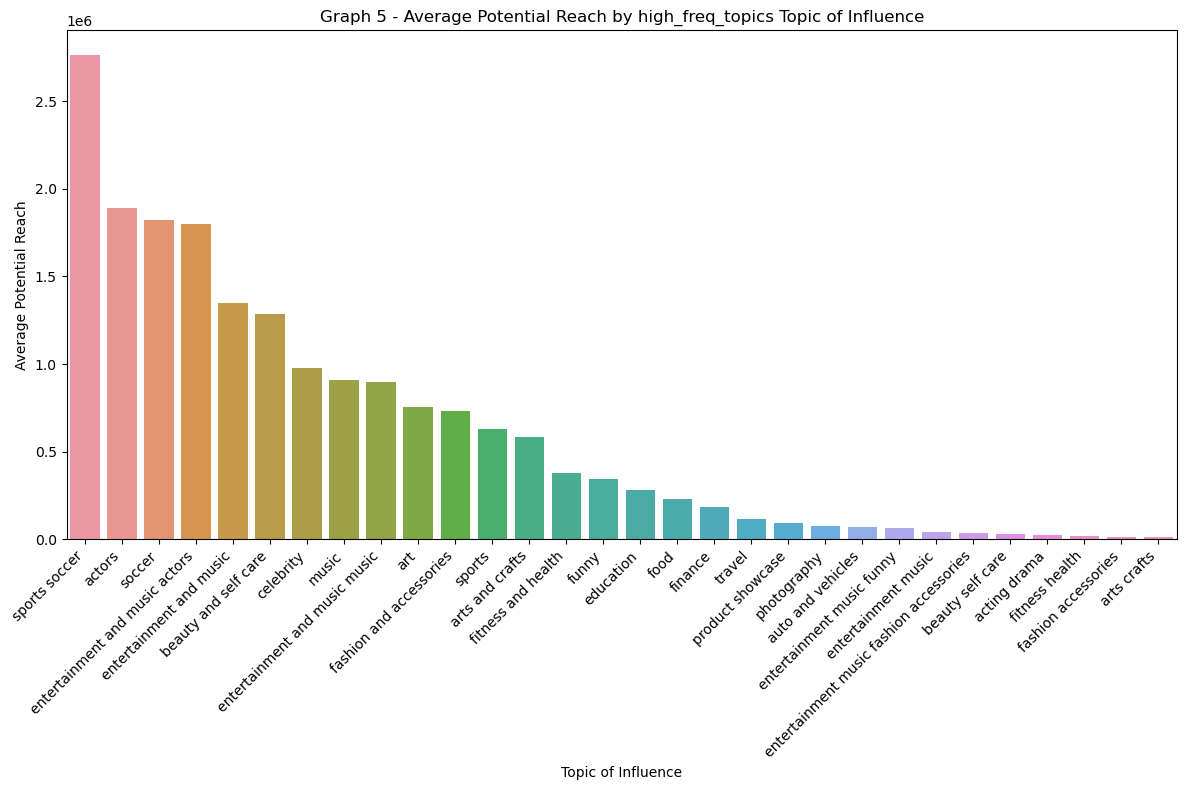

In [17]:
# --- Analyze Potential Reach by high_freq_topics Topic of Influence ---

reach_by_topic = filtered_df.groupby('TOPIC OF INFLUENCE')['POTENTIAL REACH'].mean()
reach_by_topic = reach_by_topic.sort_values(ascending=False)


#--------- Plot

plt.figure(figsize=(12, 8))
sns.barplot(x=reach_by_topic.index, y=reach_by_topic.values)
plt.title('Graph 5 - Average Potential Reach by high_freq_topics Topic of Influence')
plt.xlabel('Topic of Influence')
plt.ylabel('Average Potential Reach')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



We can further analyse the average of potential reach from the influencers across the most popular Topics of Influence in graph 5. There's a clear difference in reach depending on the topic, with "sports soccer" and "actors" having a much higher average reach than others. The topics with the highest potential reach tend to be related to sports, entertainment, and celebrity, suggesting influencers in these areas have a greater ability to connect with a wider audience.

On the other hand, topics like "fashion accessories," "arts and crafts," and "beauty self care" have a lower average reach, possibly indicating smaller or more targeted audiences. It's also interesting to note that while "entertainment and music" overall has a high reach, more specific subcategories within this topic have a lower reach. This might mean that broader entertainment influencers have wider appeal, while those focusing on specific niches within entertainment have a more targeted audience. Generally, the topics on the left side of the graph are associated with higher potential reach. This graph shows how important it is to consider the "Topic of Influence" when assessing an influencer's potential reach.

Another exploration point is to be believed that there is a positive correlation between followers and engagement rate. This assumes that as the number of followers increases, the engagement rate tends to increase too. Further statistical Analysis is carried out to test this assumption. It first iterates through each channel in the grouped DataFrame by Channel and calculates the Pearson correlation coefficient between the log-transformed follower count and engagement rate. The results are stored in the dictionary called correlation_results and figure below shows:


In [18]:
grouped_df = merged_df.groupby('CHANNEL')

correlation_results = {}
for channel, group in grouped_df:
    correlation_coef = np.corrcoef(np.log(group['FOLLOWERS']), np.log(group['ER']))[0, 1]
    correlation_results[channel] = correlation_coef

for channel, coef in correlation_results.items():
    print(f"Channel: {channel}, Correlation Coefficient: {coef:.3f}")

Channel: instagram, Correlation Coefficient: -0.140
Channel: threads, Correlation Coefficient: 0.041
Channel: tiktok, Correlation Coefficient: 0.121
Channel: youtube, Correlation Coefficient: -0.124


In [19]:
correlation_results = {}
for channel, group in grouped_df:
    # Convert Series to NumPy arrays
    followers = np.log(group['FOLLOWERS'].values)
    er = np.log(group['ER'].values)
    reach = np.log(group['POTENTIAL REACH'].values)

    # Stack the arrays horizontally to create a 2D array
    data = np.vstack([followers, er, reach])

    # Calculate correlation matrix (with transposition)
    corr_matrix = np.corrcoef(data)

    # Extract relevant correlations
    followers_er_corr = corr_matrix[0, 1]  # Correlation between followers and ER
    followers_reach_corr = corr_matrix[0, 2]  # Correlation between followers and reach
    er_reach_corr = corr_matrix[1, 2]  # Correlation between ER and reach

    correlation_results[channel] = {
        'followers_er': followers_er_corr,
        'followers_reach': followers_reach_corr,
        'er_reach': er_reach_corr
    }
    
for channel, correlations in correlation_results.items():
    print(f"Channel: {channel}")
    print(f"  Followers vs. ER: {correlations['followers_er']:.3f}")
    print(f"  Followers vs. Reach: {correlations['followers_reach']:.3f}")
    print(f"  ER vs. Reach: {correlations['er_reach']:.3f}")
    print("-" * 20)  # Print a separator line

Channel: instagram
  Followers vs. ER: -0.140
  Followers vs. Reach: 1.000
  ER vs. Reach: -0.140
--------------------
Channel: threads
  Followers vs. ER: 0.041
  Followers vs. Reach: 1.000
  ER vs. Reach: 0.041
--------------------
Channel: tiktok
  Followers vs. ER: 0.121
  Followers vs. Reach: 1.000
  ER vs. Reach: 0.121
--------------------
Channel: youtube
  Followers vs. ER: -0.124
  Followers vs. Reach: 1.000
  ER vs. Reach: -0.123
--------------------


The correlation coefficients will range from -1 to 1.
* A negative coefficient indicates a negative correlation (as followers increase, engagement tends to decrease).
* The closer the coefficient is to -1 or 1, the stronger the linear relationship.
* A coefficient close to 0 suggests a weak or no linear relationship.

Based on the results from the previous graph, one more dimension was added for this correlation calculation, the Potential Reach. It is then analysed further by correlating Followers versus ER, Followers versus Reach and ER versus Reach. 


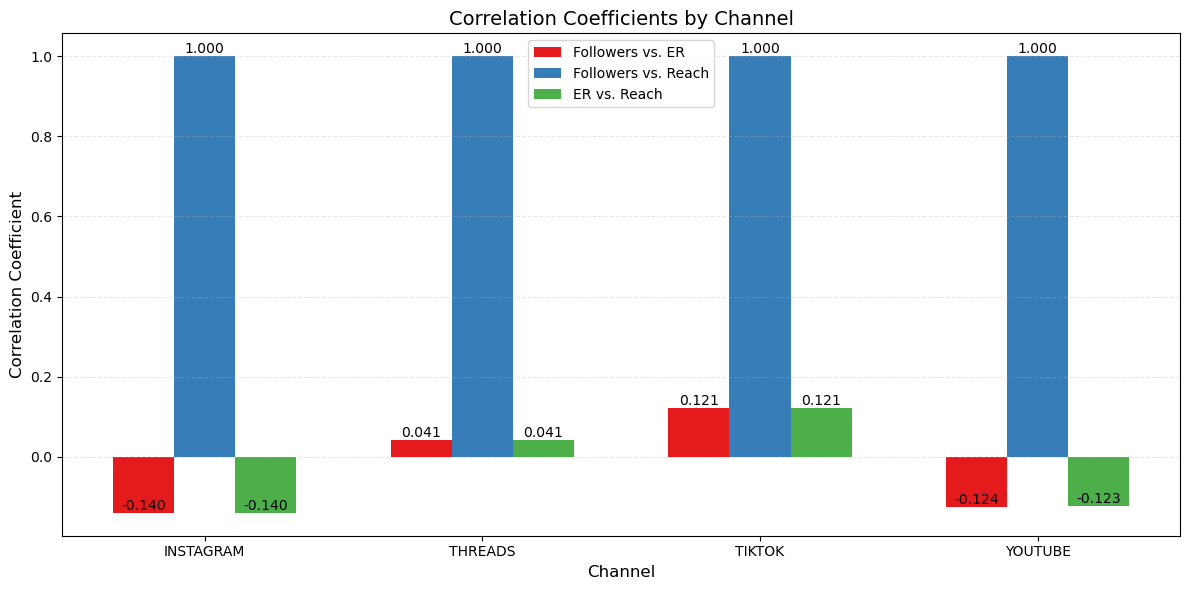

In [20]:

# Extract data for plotting
channels = list(correlation_results.keys())
followers_er = [correlations['followers_er'] for correlations in correlation_results.values()]
followers_reach = [correlations['followers_reach'] for correlations in correlation_results.values()]
er_reach = [correlations['er_reach'] for correlations in correlation_results.values()]

# Set up the bar positions
bar_width = 0.22
index = np.arange(len(channels))

plt.figure(figsize=(12, 6))

# Create bars for each correlation type
plt.bar(index, followers_er, bar_width, label='Followers vs. ER', color='#e41a1c')
plt.bar(index + bar_width, followers_reach, bar_width, label='Followers vs. Reach', color='#377eb8')
plt.bar(index + 2 * bar_width, er_reach, bar_width, label='ER vs. Reach', color='#4daf4a')

# Set chart labels and title
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.title('Correlation Coefficients by Channel', fontsize=14)
plt.xticks(index + bar_width, [channel.upper() for channel in channels], fontsize=10)

plt.legend(loc='upper center')
plt.grid(axis='y', linestyle='--', alpha=0.3)


# Annotate bars with values (optional)
correlation_types = [followers_er, followers_reach, er_reach]
offsets = [0, bar_width, 2 * bar_width]  # Offsets for each bar group

for i, (corr_type, offset) in enumerate(zip(correlation_types, offsets)):
    for j, v in enumerate(corr_type):
        plt.text(j + offset, v, f"{v:.3f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Here we see a strong Correlation between Followers and Reach:  A correlation coefficient of 1.000 between followers and potential reach indicates a perfect positive linear relationship. This implies that potential reach increases directly proportionally with the number of followers across all platforms. This makes intuitive sense, as a larger follower count generally translates to a wider potential audience.


However, we get varying Correlations between Followers/Reach and ER. The correlations between followers (or reach) and engagement rate (ER) are different for each platform and generally weak:
* Instagram and YouTube: Show a slight negative correlation, suggesting a weak tendency for ER to decrease as follower count/reach increases.
* Threads and TikTok: Show a weak positive correlation, suggesting a slight tendency for ER to increase with follower count/reach.

Some possible interpretations might be that the differences in correlations might reflect the unique characteristics and algorithms of each platform. For instance, newer platforms like Threads, might favour higher engagement for growing accounts, while more established platforms like Instagram and YouTube might see a dilution of engagement with larger audiences.

The type of content and engagement strategies employed on each platform could also play a role.  TikTok, known for its short-form video format and trend-driven content, might encourage higher engagement as accounts grow and reach a wider audience. The type of content is not considered in this analysis, nor the audience behaviour.


## Conclusion


This study has provided insights into the dynamics of influencer marketing, addressing the initial questions about the relationship between channel, reach, engagement, and topic of influence. While Instagram emerged as the most popular channel across various metrics, the study also revealed the significant role of other platforms like TikTok and YouTube, each with its unique strengths and audience characteristics.  
The analysis of influencer data by country highlighted the importance of considering geographical factors in campaign planning. The US exhibits the largest influencer audience, while countries like Egypt and South Korea demonstrate higher engagement rates, suggesting that follower count alone is not a sufficient indicator of campaign success.  
The study also revealed interesting trends in the topic of influence, with entertainment music, fashion, and sports being the most popular categories. The analysis of potential reach across different topics underscored the importance of aligning influencer specialisation with campaign objectives.  
Furthermore, the study searched through into the correlation between Followers, Engagement Rate, and Reach, revealing varying relationships across distinct channels. These findings, emphasises the need for a refined understanding of platform-specific dynamics when designing influencer marketing strategies.  
In conclusion, this study provides a starting point for making informed decisions in influencer marketing, considering factors beyond follower count. It also highlights the need for further research and data development to explore the qualitative aspects of content, audience demographics, influencer authenticity, and long-term impact, ultimately contributing to a more comprehensive understanding of influencer marketing dynamics. For instance, it could be considered Regression Analysis to model the relationship between variables (e.g., predict reach based on follower count and engagement rate) or Supervised Learning to build a classification model to predict influencer categories or success based on their attributes.
